# Part 0: Prerequisites

Before we can start this lab, we need to install a CLI tool and a Python SDK to interact with Azure.

**Installing Azure Command Line Interface (Azure CLI)**

This command is used to install the Azure Command Line Interface (Azure CLI) on a Linux-based system. Azure CLI is a set of open-source commands for managing Azure resources and services from the command line. We'll use the Azure CLI to authenticate ourselves.


In [ ]:
!curl -sL https://aka.ms/InstallAzureCLIDeb | sudo bash

**Installing the Azure Python packages**

This command is used to install some Azure Python packages:

- `azure-mgmt-resource`: provides functionality for managing Azure resources.
- `azure-ai-ml`: provides functionality for working with Azure Machine Learning services.

In [ ]:
!pip install azure-mgmt-resource azure-ai-ml

# Part 1: Very Basic Image Classifier in notebook


The typical machine learning (ML) workflow begins within a Jupyter notebook where data scientists and analysts prototype and experiment with ML models. In the notebook, they perform essential tasks such as data preprocessing, exploratory data analysis (EDA), feature engineering, model selection, training, and evaluation. Once a promising model is developed and tested locally, the transition to MLOps (Machine Learning Operations) is crucial.

### Imports

This code cell sets up the environment for working with different python packages. We import the following packages:

- `tensorflow` for TensorFlow.
- `ImageDataGenerator` from `tensorflow.keras.preprocessing.image` for image data augmentation.
- `numpy` for numerical operations.
- `matplotlib.pyplot` for data visualization.

We check the TensorFlow version by print the TensorFlow version. This can be useful to verify that you're using the desired version.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

### Constants

This code cell defines a set of configuration constants that are commonly used when working with image datasets for machine learning tasks. These constants help streamline the process of setting up and training models.

In [ ]:
DATASET = "dataset"
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 8
EPOCHS = 10

### Creating the dataset

This shell command removes a directory and its contents using the rm command with the `-rf` flags. The `-r` flag stands for "recursive," which means that it will remove not only the directory itself but also all files and subdirectories within it. The `-f` flag stands for "force," which suppresses any confirmation prompts, making the removal process non-interactive.

In [ ]:
!rm -rf dataset

This code cell is responsible for downloading image data and organizing it into a structured directory hierarchy. It is a common step in machine learning projects, especially when working with image classification tasks. The code downloads images of apples and oranges from various URLs and categorizes them into training, validation, and test sets.


The dataset provided serves as a useful illustration of machine learning concepts, showcasing how to organize and prepare data for a model. However, it's important to note that this example dataset is exceptionally small in scale, containing just a handful of images of apples and oranges. In practice, real-world datasets can be significantly larger and more complex.

Collecting real datasets for machine learning tasks often presents substantial challenges. Here are a few key considerations:

- **Size:** Real datasets may consist of thousands or even millions of samples, necessitating extensive storage and computational resources for handling and processing.
- **Labeling:** In many cases, each data point must be labeled or categorized correctly. Manual labeling can be a time-consuming and labor-intensive process, especially for large datasets.
- **Diversity:** Real datasets often exhibit a wide range of variations, noise, and complexities, making them more representative of the challenges encountered in real-world applications.
- **Bias and Fairness:** Ensuring that a dataset is unbiased and fairly represents diverse demographics and scenarios is crucial for ethical and accurate machine learning.
- **Privacy and Compliance:** Handling sensitive or personal data requires strict adherence to privacy regulations, adding legal and ethical dimensions to dataset collection.

In [ ]:
import os
import requests

for path in [
    "dataset/train/apples",
    "dataset/val/apples",
    "dataset/test/apples",
    "dataset/train/oranges",
    "dataset/val/oranges",
    "dataset/test/oranges",
]:
    os.makedirs(path)


def download_from_list(list, type):
    for i, img_url in enumerate(list):
        response = requests.get(img_url)
        response.raise_for_status()

        ml_split = "train"
        if i == 9:
            ml_split = "test"
        elif i == 8:
            ml_split = "val"

        with open(f"dataset/{ml_split}/{type}s/{type}{i}.jpeg", "wb") as file:
            file.write(response.content)


download_from_list(
    [
        "https://images.unsplash.com/photo-1570913149827-d2ac84ab3f9a?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8fA%3D%3D&w=1000&q=80",
        "https://thumbs.dreamstime.com/b/red-apple-isolated-clipping-path-19130134.jpg",
        "https://images.unsplash.com/photo-1610397962076-02407a169a5b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8Mnx8fGVufDB8fHx8fA%3D%3D&w=1000&q=80",
        "https://images.unsplash.com/photo-1568702846914-96b305d2aaeb?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2940&q=80",
        "https://images.unsplash.com/photo-1576179635662-9d1983e97e1e?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2787&q=80",
        "https://domf5oio6qrcr.cloudfront.net/medialibrary/11525/0a5ae820-7051-4495-bcca-61bf02897472.jpg",
        "https://img.freepik.com/free-photo/two-red-apples-isolated-white_114579-73124.jpg",
        "https://t3.ftcdn.net/jpg/01/09/81/46/360_F_109814626_y5dGATGj8h3pMz9tq1HNRfiuXR12uFCj.jpg",
        "https://i.pinimg.com/originals/e7/4e/78/e74e782a805bf6f2cc8f178a6063f9d7.jpg",
        "https://images.unsplash.com/photo-1584306670957-acf935f5033c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8OHx8fGVufDB8fHx8fA%3D%3D&w=1000&q=80",
    ],
    "apple",
)

download_from_list(
    [
        "https://plus.unsplash.com/premium_photo-1671013032586-3e9a5c49ce3c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2787&q=80",
        "https://images.unsplash.com/photo-1547514701-42782101795e?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2787&q=80",
        "https://images.unsplash.com/photo-1514936477380-5ea603b9a1ca?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2835&q=80",
        "https://img.freepik.com/free-photo/orange-white-white_144627-16571.jpg?w=2000",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWbb0dC-vAS3Mqx6l_F6uDkUSWFtjHJ8v-MA&usqp=CAU",
        "https://static3.depositphotos.com/1000955/120/i/450/depositphotos_1207359-stock-photo-orange.jpg",
        "https://publish.purewow.net/wp-content/uploads/sites/2/2021/02/types-of-oranges-navel-oranges.jpg?fit=680%2C489",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnS7lPkp0iYsdVraHtEdmNMQ4g7CFNXGZIuFPyNDZamQG29q6K2mLKo1MbSeYfn8NdWoM&usqp=CAU",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgA7xpOViT-HeWGzj7f3-rWgX9Fu-dabTj4g&usqp=CAU",
        "https://modernfarmer.com/wp-content/uploads/2018/02/Navel_Orange.jpg",
    ],
    "orange",
)

### Preprocessing

In the machine learning workflow, preprocessing is a crucial step that focuses on preparing and enhancing the raw data before it's fed into a model. It plays a pivotal role in shaping the success of a machine learning algorithm. Data preprocessing encompasses various tasks, including cleaning, transformation, and feature engineering.

In the case of image data, as seen in the following code cell, preprocessing often includes resizing images, rescaling pixel values, and organizing data into batches. These steps ensure that the data is in a suitable format and distribution for training and evaluation, ultimately leading to more accurate and efficient machine learning models.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    f"{DATASET}/train",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    f"{DATASET}/val",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
)

test_generator = test_datagen.flow_from_directory(
    f"{DATASET}/test",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
)

### Build the model

This code cell defines and builds a Convolutional Neural Network (CNN) model using the Keras library. CNNs are a class of deep learning models commonly used for image classification and computer vision tasks. The model architecture is relatively simple, consisting of convolutional layers, activation functions, and dense layers.

> **Challenge**: Can you think of changes we could make that could improve our final result?

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Activation, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

This code cell compiles a deep learning model using the Keras library. Compilation is an essential step in preparing the model for training. During compilation, you specify various aspects of the training process, such as the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

### Training the model

This code cell initiates the training of a deep learning model using the previously compiled model, training data generator, and validation data generator. It leverages the fit method in Keras to start the training process, and it also stores training history for later analysis and visualization.

> **Note**: Training doesn't take long at all since we only have a toy dataset to work with. In real cases this can take hours or days to complete.

> **Challenge**: Can you think of changes we could make that could speed up training?

In [ ]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

### Evaluation

This code cell is responsible for evaluating the performance of a trained deep learning model on a test dataset. It uses the evaluate method in Keras to compute the model's test loss and accuracy based on the test data generator.

In [ ]:
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=len(test_generator)
)

print('Test accuracy:', test_accuracy)
print('Test Loss:', test_loss)

# Part 2: Creating an MLOps pipeline

At this point we have a typical notebook and we've proven that our model works. Let's go to production! This is where the real works starts. No AI-product or AI-project should be considered finished without having MLOps in place.

MLOps bridges the gap between ML development and production deployment by automating and streamlining the deployment, monitoring, and management of ML models. This transition typically involves creating an MLOps pipeline.

Continuous integration and continuous deployment (CI/CD) practices are often employed to ensure that updates and improvements to the model are seamlessly deployed into production while maintaining reliability and performance. This combination of ML development and MLOps practices enables organizations to develop, deploy, and maintain ML solutions efficiently and at scale.

We split our notebook above into 4 main parts. Each will represent it's own component in our final pipeline:
- preprocess
- train
- evaluate
- deployment

We'll use Azure to run our ML Pipeline, and to do so we need to authenticate ourselves. We'll do this in an interactive way, use your HOGENT account!

In [ ]:
!az login

This code cell sets up the configuration for using Azure Machine Learning services within a Jupyter Notebook. It uses the Azure SDK for Python and Azure Identity library to establish the necessary credentials and workspace information.


In the context of Azure Machine Learning, a workspace is a fundamental concept that represents a container for organizing, managing, and tracking various machine learning assets and resources within the Azure cloud environment. Workspaces provide a collaborative and centralized platform for data scientists, machine learning engineers, and researchers to work together on machine learning projects.

Fill the ID of your Azure subscription in the `SUBSCRIPTION_ID` variable. In your case, this is the Azure for Students subscription. You can find this under "Subscriptions" in the [Azure Portal](https://portal.azure.com).

We also define a `RESOURCE_GROUP` and `WORKSPACE_NAME`:

- `RESOURCE_GROUP`: the name of the resource group every Azure resource in this lab will be created in.
- `WORKSPACE_NAME`: the name of the workspace the pipeline will be part of.

You can choose any name you like, but it's okay to leave both as is.

In [ ]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

credential = DefaultAzureCredential()

# TODO: fill in your subscription ID
SUBSCRIPTION_ID = "3103e99c-3bd0-4a81-aef9-9270f0d557d4"

# Leave these alone
RESOURCE_GROUP_NAME = "MLOps"
WORKSPACE_NAME = "fruits"
AZURE_REGION = "westeurope"

Let's first create a resource group:

In [ ]:
from azure.identity import AzureCliCredential
from azure.mgmt.resource import ResourceManagementClient

resource_client = ResourceManagementClient(credential, SUBSCRIPTION_ID)

rg_result = resource_client.resource_groups.create_or_update(
  RESOURCE_GROUP_NAME, { "location": AZURE_REGION }
)

print(f"Provisioned resource group {rg_result.name} in the {rg_result.location} region")

Now let's create an Azure Machine Learning client to connect to Azure Machine Learning services. We'll use this client to create and manage various Azure Machine Learning resources.

In [ ]:
ml_client = MLClient(
    credential=credential,
    subscription_id=SUBSCRIPTION_ID,
    resource_group_name=RESOURCE_GROUP_NAME,
)

Before you can run an Azure ML pipeline, you need a workspace. You can create a workspace using the Azure Portal, the Azure CLI, or the Azure ML SDK. In this case, we'll use the Azure ML SDK to create a workspace.

This will print an URL where you can track the progress of the deployment in the Azure portal. It will also print some updates in this cell's output.

In [ ]:
from azure.ai.ml.entities import Workspace
import datetime

ws_basic = Workspace(
    name=WORKSPACE_NAME,
    location=AZURE_REGION,
    display_name="MLOps Fruits demo"
)

ws_basic = ml_client.workspaces.begin_create(ws_basic).result()
print(f"Provisioned ML workspace with name {ws_basic.name} in region {ws_basic.location}")

Let's recreate our `MLClient` so it points to the created workspace.

In [ ]:
ml_client = MLClient(
    credential=credential,
    subscription_id=SUBSCRIPTION_ID,
    resource_group_name=RESOURCE_GROUP_NAME,
    workspace_name=WORKSPACE_NAME
)

This code cell creates a directory structure within the project to organize the source code for various components of a machine learning pipeline. Proper organization of code and scripts is crucial for maintaining a structured and manageable ML project.

In [ ]:
!mkdir -p components/preprocess/src components/train/src components/eval/src components/deploy/src

### Preprocess component

Machine learning pipelines often involve multiple steps, such as data preprocessing, model training, and evaluation. These steps can be organized and executed as components within the pipeline. One effective approach for defining and isolating these components is by using Docker containers. This method provides a consistent and reproducible environment for each step of the pipeline. But there are other ways to define components, such as using Python scripts.

To define components using Docker containers, you'll need the following:

- Requirements file: This file specifies the requirements that need to be installed for the Python code to run.
- Dockerfile: This file specifies the environment for the component. It contains instructions for building a container image, including the base image, dependencies, and configuration settings.
- YAML Definition: A YAML file is used to define the component within your machine learning pipeline. It describes how the component should be executed, including input and output data, environment settings, and execution commands.
- Python Code: Python code is often used to execute the logic of the component. This code can include data preprocessing, model training, evaluation, or any other specific task related to the component's purpose.

Our first component will contain the code we wrote in our notebook for the preprocessing steps.

Let's create the `requirements.txt` file:


In [ ]:
%%writefile components/preprocess/requirements.txt
requests==2.31.0
opencv-python-headless==4.8.0.76

Next, let's create the `Dockerfile` file:

In [ ]:
%%writefile components/preprocess/Dockerfile
FROM mcr.microsoft.com/azureml/openmpi4.1.0-ubuntu20.04

COPY ./requirements.txt /requirements.txt

RUN pip install -r requirements.txt

COPY ./src /src

CMD ["python", "/src/main.py"]

Next, we define our component in YAML:

In [ ]:
%%writefile components/preprocess/component.yaml
$schema: https://azuremlschemas.azureedge.net/latest/commandComponent.schema.json
type: command

name: preprocess
version: 1

outputs:
  training_data:
    type: uri_folder
  val_data:
    type: uri_folder
  test_data:
    type: uri_folder

code: ./src

environment: azureml:mlops-preprocessing-docker-environment@latest

command: >-
  python main.py
  --training_data ${{outputs.training_data}}
  --val_data ${{outputs.val_data}}
  --test_data ${{outputs.test_data}}

Lastly, we add the Python code:

In [ ]:
%%writefile components/preprocess/src/main.py
import argparse
import glob
import os
import shutil

import cv2
import requests

IMAGE_SIZE = (150, 150)


def _download_from_list(list, type):
    for i, img_url in enumerate(list):
        response = requests.get(img_url)
        response.raise_for_status()

        ml_split = "train"
        if i == 9:
            ml_split = "test"
        elif i == 8:
            ml_split = "val"

        with open(f"dataset/{ml_split}/{type}s/{type}{i}.jpeg", "wb") as file:
            file.write(response.content)


def _get_dataset():
    for path in [
        "dataset/train/apples",
        "dataset/val/apples",
        "dataset/test/apples",
        "dataset/train/oranges",
        "dataset/val/oranges",
        "dataset/test/oranges",
    ]:
        os.makedirs(path)

    _download_from_list(
        [
            "https://images.unsplash.com/photo-1570913149827-d2ac84ab3f9a?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8fA%3D%3D&w=1000&q=80",
            "https://thumbs.dreamstime.com/b/red-apple-isolated-clipping-path-19130134.jpg",
            "https://images.unsplash.com/photo-1610397962076-02407a169a5b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8Mnx8fGVufDB8fHx8fA%3D%3D&w=1000&q=80",
            "https://images.unsplash.com/photo-1568702846914-96b305d2aaeb?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2940&q=80",
            "https://images.unsplash.com/photo-1576179635662-9d1983e97e1e?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2787&q=80",
            "https://domf5oio6qrcr.cloudfront.net/medialibrary/11525/0a5ae820-7051-4495-bcca-61bf02897472.jpg",
            "https://img.freepik.com/free-photo/two-red-apples-isolated-white_114579-73124.jpg",
            "https://t3.ftcdn.net/jpg/01/09/81/46/360_F_109814626_y5dGATGj8h3pMz9tq1HNRfiuXR12uFCj.jpg",
            "https://i.pinimg.com/originals/e7/4e/78/e74e782a805bf6f2cc8f178a6063f9d7.jpg",
            "https://images.unsplash.com/photo-1584306670957-acf935f5033c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8OHx8fGVufDB8fHx8fA%3D%3D&w=1000&q=80",
        ],
        "apple",
    )

    _download_from_list(
        [
            "https://plus.unsplash.com/premium_photo-1671013032586-3e9a5c49ce3c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2787&q=80",
            "https://images.unsplash.com/photo-1547514701-42782101795e?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2787&q=80",
            "https://images.unsplash.com/photo-1514936477380-5ea603b9a1ca?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2835&q=80",
            "https://img.freepik.com/free-photo/orange-white-white_144627-16571.jpg?w=2000",
            "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWbb0dC-vAS3Mqx6l_F6uDkUSWFtjHJ8v-MA&usqp=CAU",
            "https://static3.depositphotos.com/1000955/120/i/450/depositphotos_1207359-stock-photo-orange.jpg",
            "https://publish.purewow.net/wp-content/uploads/sites/2/2021/02/types-of-oranges-navel-oranges.jpg?fit=680%2C489",
            "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnS7lPkp0iYsdVraHtEdmNMQ4g7CFNXGZIuFPyNDZamQG29q6K2mLKo1MbSeYfn8NdWoM&usqp=CAU",
            "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgA7xpOViT-HeWGzj7f3-rWgX9Fu-dabTj4g&usqp=CAU",
            "https://thumbs.dreamstime.com/b/orange-fruit-green-leaves-isolated-white-background-clipping-path-full-depth-field-fresh-177726692.jpg",
        ],
        "orange",
    )


def component(training_data, val_data, test_data):
    _get_dataset()

    for img_path in glob.glob("dataset/*/*/*.jpeg"):
        img = cv2.imread(img_path)
        img = cv2.resize(img, IMAGE_SIZE)
        img = img.astype("float32") / 255.0
        cv2.imwrite(img_path, img)

    shutil.copytree("dataset/train", f"{training_data}/dataset")
    shutil.copytree("dataset/val", f"{val_data}/dataset")
    shutil.copytree("dataset/test", f"{test_data}/dataset")


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--training_data")
    parser.add_argument("--val_data")
    parser.add_argument("--test_data")
    args = parser.parse_args()

    component(args.training_data, args.val_data, args.test_data)


We create a custom Docker environment in Azure Machine Learning using the Azure Machine Learning SDK for Python. A custom environment is a specific configuration that defines the dependencies and settings required for executing machine learning components within a pipeline. In this case, the environment is set up for data preprocessing tasks.

In [ ]:
from azure.ai.ml import MLClient
from azure.ai.ml.entities import BuildContext, Environment

environment = Environment(
    build=BuildContext(path=f"./components/preprocess"),
    name=f"mlops-preprocessing-docker-environment",
    description=f"Custom environment used at HoGent for preprocessing created from a Docker context.",
)

ml_client.environments.create_or_update(environment)

### Train component

Our next component will contain the same code as we had in our notebook for training the model.

First, we create the `requirements.txt` file:

In [ ]:
%%writefile components/train/requirements.txt
tensorflow==2.13.0
scipy==1.10.1
Pillow==9.4.0
mlflow==2.7.0
azureml-mlflow==1.53.0

Next, let's create the `Dockerfile` file:

In [ ]:
%%writefile components/train/Dockerfile
FROM mcr.microsoft.com/azureml/openmpi4.1.0-ubuntu20.04

COPY ./requirements.txt requirements.txt

RUN pip install -r requirements.txt

COPY ./src /src

CMD ["python", "/src/main.py"]

Next, we define our component in YAML:

In [ ]:
%%writefile components/train/component.yaml
$schema: https://azuremlschemas.azureedge.net/latest/commandComponent.schema.json
type: command

name: train
version: 1

inputs:
  training_data:
    type: uri_folder
  val_data:
    type: uri_folder
outputs:
  model_folder:
    type: uri_folder

code: ./src

environment: azureml:mlops-train-docker-environment@latest

command: >-
  python main.py
  --training_data ${{inputs.training_data}}
  --val_data ${{inputs.val_data}}
  --model_folder ${{outputs.model_folder}}

Lastly, we add the Python code:

In [ ]:
%%writefile components/train/src/main.py
import argparse

import mlflow
import mlflow.keras
import tensorflow as tf
from keras.layers import Activation, Conv2D, Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 8
EPOCHS = 10


def _build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
    model.add(Activation("relu"))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation("relu"))

    model.add(Dense(2))
    model.add(Activation("sigmoid"))

    return model


def _load_data(training_data, val_data):
    train_datagen = ImageDataGenerator()
    validation_datagen = ImageDataGenerator()

    train_generator = train_datagen.flow_from_directory(
        f"{training_data}/dataset",
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode="binary",
        shuffle=True,
    )

    validation_generator = validation_datagen.flow_from_directory(
        f"{val_data}/dataset",
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode="binary",
    )

    return train_generator, validation_generator


def component(training_data, val_data, model_file):
    train_generator, validation_generator = _load_data(training_data, val_data)

    model = _build_model()

    model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    mlflow.keras.autolog()

    _ = model.fit(
        train_generator,
        epochs=EPOCHS,
        steps_per_epoch=len(train_generator),
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
    )

    model.save(model_file)


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--training_data")
    parser.add_argument("--val_data")
    parser.add_argument("--model_folder")
    args = parser.parse_args()

    component(args.training_data, args.val_data, args.model_folder)


The files above let us create a new custom environment for training:

In [ ]:
environment = Environment(
    build=BuildContext(path=f"./components/train"),
    name=f"mlops-train-docker-environment",
    description=f"Custom environment used at HoGent for training created from a Docker context.",
)

ml_client.environments.create_or_update(environment)

**What's MLFlow?**

MLFlow is a popular open-source platform designed to streamline the end-to-end machine learning lifecycle. It is widely used in the data science and machine learning community for several key reasons. MLFlow provides a cohesive and organized environment for tracking experiments, managing machine learning projects, and sharing results. Its robust capabilities encompass experiment tracking, model versioning, reproducibility, and deployment. With MLFlow, data scientists and engineers can efficiently experiment with various algorithms and hyperparameters, maintain a comprehensive record of their work, and ensure reproducibility in model development. Additionally, MLFlow simplifies the process of packaging and deploying models into production environments, making it a valuable tool for bridging the gap between experimentation and deployment in machine learning projects.

Since we're using a well-known framework like Keras on a well-known Cloud (Azure), we can rely on the `autolog` functionality (see `mlflow.keras.autolog()` in `component` function above). You can reed more about this here: <https://learn.microsoft.com/en-us/azure/machine-learning/how-to-log-mlflow-models?view=azureml-api-2&tabs=wrapper#logging-models-using-autolog>.

It's also possible to log images, metrics and other artifacts manually.

### Eval component

The second last component of our pipeline will contain the same code as we had in our notebook for evaluating the model.

First, we create the `requirements.txt` file:

In [ ]:
%%writefile components/eval/requirements.txt
tensorflow==2.13.0
scipy==1.10.1
Pillow==9.4.0
mlflow==2.7.0
azureml-mlflow==1.53.0

Next, we create the `Dockerfile`:

In [ ]:
%%writefile components/eval/Dockerfile
FROM mcr.microsoft.com/azureml/openmpi4.1.0-ubuntu20.04

COPY ./requirements.txt requirements.txt

RUN pip install -r requirements.txt

COPY ./src /src

CMD ["python", "/src/main.py"]

Next, we define our component in YAML:

In [ ]:
%%writefile components/eval/component.yaml
$schema: https://azuremlschemas.azureedge.net/latest/commandComponent.schema.json
type: command

name: eval
version: 1

inputs:
  test_data:
    type: uri_folder
  model_folder:
    type: uri_folder

code: ./src

environment: azureml:mlops-eval-docker-environment@latest

command: >-
  python main.py
  --test_data ${{inputs.test_data}}
  --model_folder ${{inputs.model_folder}}

Lastly, we add the Python code:

In [ ]:
%%writefile components/eval/src/main.py
import argparse

import mlflow
import mlflow.keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 8


def component(test_data, model_folder):
    test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    test_generator = test_datagen.flow_from_directory(
        f"{test_data}/dataset",
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode="binary",
    )

    mlflow.keras.autolog()

    model = tf.keras.models.load_model(model_folder)

    test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--test_data")
    parser.add_argument("--model_folder")
    args = parser.parse_args()

    component(args.test_data, args.model_folder)


The files above let us create a new custom Environment for evaluation:

In [ ]:
environment = Environment(
    build=BuildContext(path=f"./components/eval"),
    name=f"mlops-eval-docker-environment",
    description=f"Custom environment used at HoGent for evaluation created from a Docker context.",
)

ml_client.environments.create_or_update(environment)

### Deploy component

TODO: deploy component

The last component of our pipeline will involve deploying the model in the Azure Machine Learning environment.

First, we create the `requirements.txt` file:

In [ ]:
%%writefile components/deploy/requirements.txt
azureml-core==1.53.0
azure-ai-ml==1.10.1

Next, we create the `Dockerfile`:

In [ ]:
%%writefile components/deploy/Dockerfile
FROM mcr.microsoft.com/azureml/openmpi4.1.0-ubuntu20.04

COPY ./requirements.txt requirements.txt

RUN pip install -r requirements.txt

COPY ./src /src

CMD ["python", "/src/main.py"]

Next, we define our component in YAML:

In [ ]:
%%writefile components/deploy/component.yaml
$schema: https://azuremlschemas.azureedge.net/latest/commandComponent.schema.json
type: command

name: deploy
version: 1

inputs:
  model_folder:
    type: uri_folder

code: ./src

environment: azureml:mlops-deploy-docker-environment@latest

command: >-
  python main.py
  --model_folder ${{inputs.model_folder}}

Lastly, we add the Python code:

In [ ]:
%%writefile components/deploy/src/main.py
from azureml.core.model import Model
from azureml.core.run import Run, _OfflineRun
from azureml.core import Workspace
from azure.ai.ml.entities import ManagedOnlineEndpoint
import argparse
import uuid


def component(model_folder):
    run = Run.get_context()
    ws = Workspace.from_config() if type(run) == _OfflineRun else run.experiment.workspace

    model = Model.register(
        workspace=ws,
        model_path=args.model_folder,
        model_name="Fruits"
    )

    # Create a unique name for the endpoint
    online_endpoint_name = "mlops-fruits-endpoint-" + str(uuid.uuid4())[:8]

    # define an online endpoint
    endpoint = ManagedOnlineEndpoint(
        name=online_endpoint_name,
        auth_mode="key",
    )

    # create the online endpoint
    # expect the endpoint to take approximately 2 minutes.
    endpoint = ml_client.online_endpoints.begin_create_or_update(endpoint).result()

    endpoint = ml_client.online_endpoints.get(name=online_endpoint_name)

    print(
        f'Endpoint "{endpoint.name}" with provisioning state "{endpoint.provisioning_state}" is retrieved'
    )


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--model_folder", required=True)
    args = parser.parse_args()

    component(args.model_folder)

The files above let us create a new custom Environment for deployment:

In [ ]:
environment = Environment(
    build=BuildContext(path=f"./components/deploy"),
    name=f"mlops-deploy-docker-environment",
    description=f"Custom environment used at HoGent for deployment created from a Docker context.",
)

ml_client.environments.create_or_update(environment)

### Building the pipeline

This code cell defines a machine learning pipeline using the Azure Machine Learning SDK for Python. A machine learning pipeline is a sequence of data processing and model training steps organized in a structured manner. In this example, the pipeline is named "MLOps Fruits Pipeline" and consists of three components: preprocessing, training, and evaluation.



In [ ]:
from azure.ai.ml import dsl, load_component

# Load your YAML-based components below.
preprocess = load_component(source="components/preprocess/component.yaml")
train = load_component(source="components/train/component.yaml")
eval = load_component(source="components/eval/component.yaml")
deploy = load_component(source="components/deploy/component.yaml")


@dsl.pipeline(display_name="MLOps Fruits Pipeline", default_compute="serverless")
def mlops_pipeline():

    preprocess_step = preprocess()

    training_step = train(
        training_data=preprocess_step.outputs.training_data,
        val_data=preprocess_step.outputs.val_data
    )

    _ = eval(
        test_data=preprocess_step.outputs.test_data,
        model_folder=training_step.outputs.model_folder
    )

    deploy_step = deploy(
        model_folder=training_step.outputs.model_folder
    )

    return

This code cell demonstrates how to run a previously defined machine learning pipeline within Azure Machine Learning. The pipeline, named "MLOps Fruits Pipeline", is submitted as a job to be executed in your Azure Machine Learning workspace. This allows you to automate and orchestrate the defined data preprocessing, training, and evaluation tasks.

While this cell is running, continue reading below this cell. It may take a while before the entire pipeline is finished, up to 15 minutes is no exception.

In [ ]:
pipeline = mlops_pipeline()

pipeline_job = ml_client.jobs.create_or_update(
    pipeline,
    experiment_name="mlops_experiment",
)

ml_client.jobs.stream(pipeline_job.name)

Running this machine learning pipeline successfully involves executing a series of orchestrated steps, as defined in the "MLOps Fruits Pipeline". First, ensure that your Azure Machine Learning workspace is properly configured and that you have defined the necessary components, including preprocessing, training, evaluation and deployment steps. Modify the experiment name as needed to organize your job runs effectively. Then, execute the code cell to submit the pipeline as a job. Monitor the job's progress and logs using the `ml_client.jobs.stream` function to ensure that each step is completed without errors. Successful execution of this pipeline will result in the seamless processing of data, model training, evaluation and deployment, with outputs and artifacts generated as specified. Careful configuration, validation, and monitoring are key to achieving successful and reproducible machine learning outcomes using Azure Machine Learning.

If everything went well you should have a similar view to this one in the [Azure ML Studio](https://ml.azure.com/):

TODO: update image

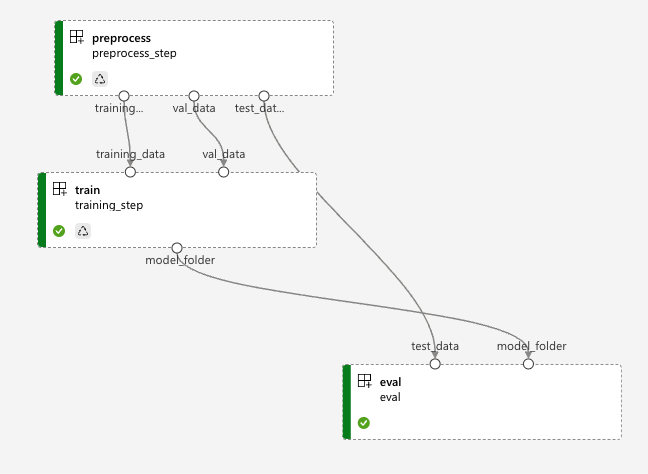

By clicking on one of these components you get to see more details. This can come in handy when in the future, you want to look back to know what happend and why.

Some of the things you can look at are:
- What compute was used
- How long it took to run this component
- The logged artifacts (files, metrics, models, ...)

When we look at the metrics we logged (or MLFlow logged automatically for us), we get to see graphs without any additional effort. These artifacts are stored indefinitely, so this is a powerful logging tool.

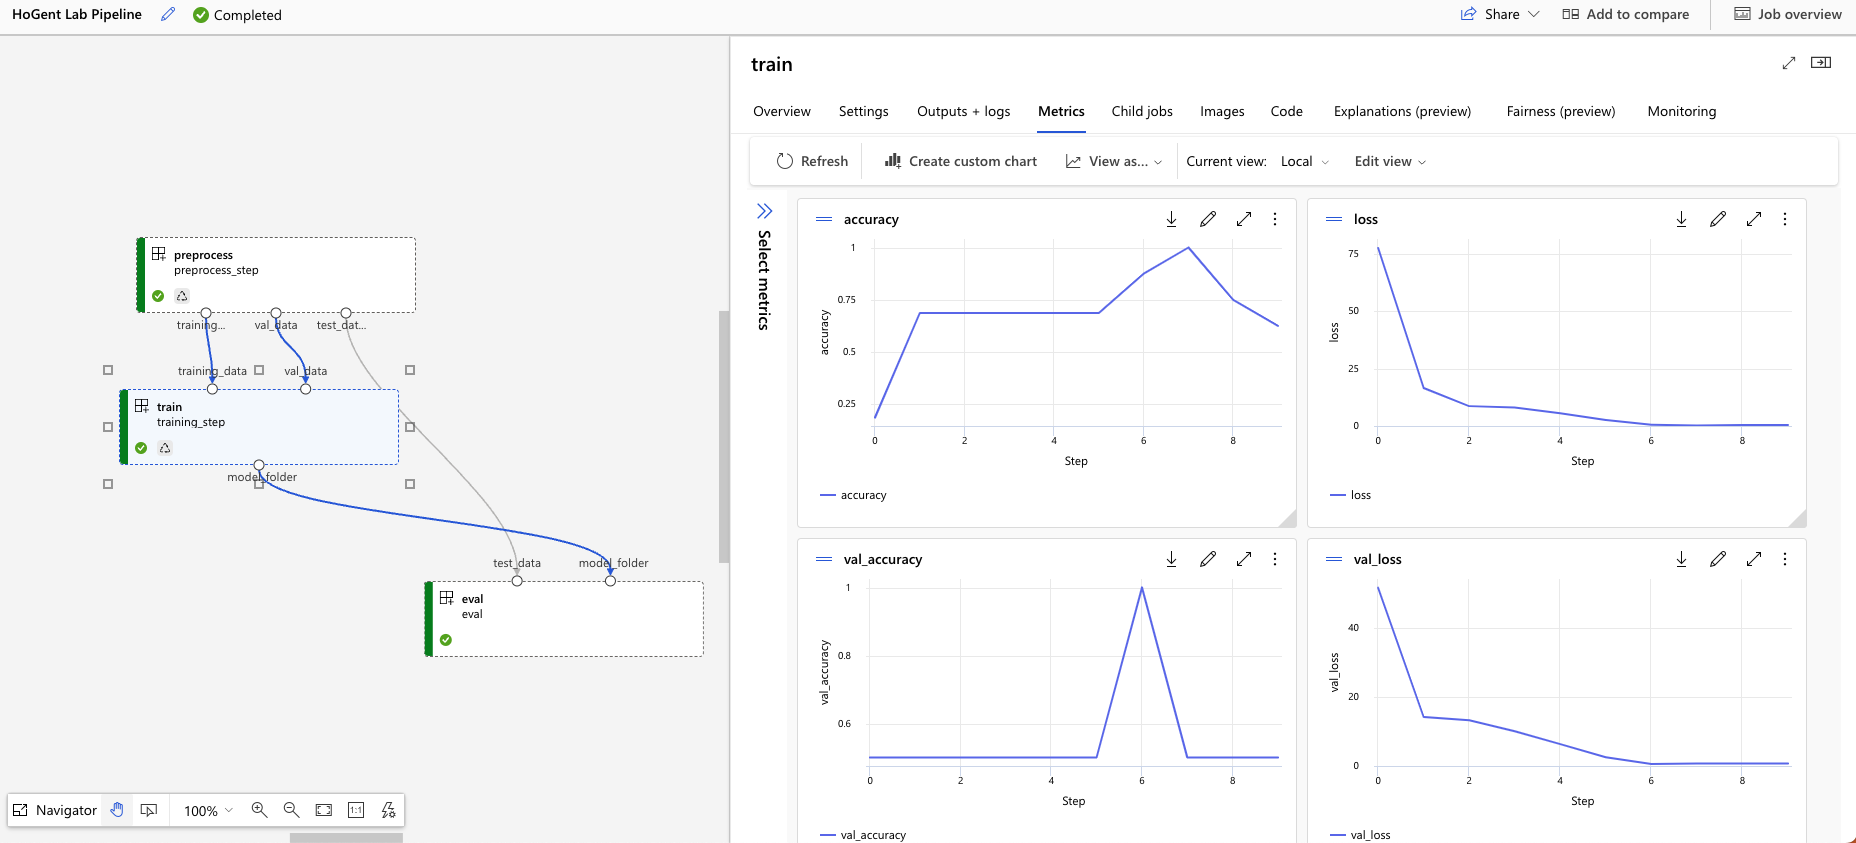



## Possible extensions

- Can you make the basic model above better? Note that better doesn't just mean scoring higher on this dataset. It means that the model is more robust and can generalize better to unseen data. You could try one or more of the following:
  - Create a better dataset  
  - Add more layers
  - Use transfer learning
  - Use hyperparameter turning
  - Data augmentation
  - ...
- Can you modify the components/pipeline so that you can choose the amount of epochs the model trains for?
- Can you modify the pipeline so that the train component is ran on specialized hardware?
- Can you add a component that:
  - compares with a certain threshold and deploys if the score is higher than the threshold
  - optimizes the model for edge cases